In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
nf=pd.read_csv("Netflix Userbase.csv")
nf.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
nf.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [6]:
round(100*nf.isnull().sum()/len(nf))

User ID              0.0
Subscription Type    0.0
Monthly Revenue      0.0
Join Date            0.0
Last Payment Date    0.0
Country              0.0
Age                  0.0
Gender               0.0
Device               0.0
Plan Duration        0.0
dtype: float64

# Checking the Duplicate values

In [7]:
duplicates = nf[nf.duplicated()]
if duplicates.empty:
    print("No duplicates Found!")
else:
    print("Duplicates Found")
    print(duplicates)

No duplicates Found!


# Changing the dates in dateime formate

In [8]:
nf["Join Date"] = pd.to_datetime(nf["Join Date"])
nf['Last Payment Date'] = pd.to_datetime(nf['Last Payment Date'])

# Handling the date time features
nf['Join Year']= nf['Join Date'].dt.year
nf['Join Month']=nf['Join Date'].dt.month
nf['Last Payment Year']=nf['Last Payment Date'].dt.year
nf['Last Payment Month']=nf['Last Payment Date'].dt.month
nf['Account till']=(pd.to_datetime('today')-nf['Join Date']).dt.days
nf.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join Year,Join Month,Last Payment Year,Last Payment Month,Account till
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,2022,1,2023,10,577
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,2021,5,2023,6,828
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023,2,2023,6,168
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,2022,10,2023,6,312
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023,1,2023,6,222


# Renaming the Column name

In [9]:
nf.rename(columns={"Plan Duration":"Plan Duration(Month)"}, inplace =True)
for i in range(len(nf)):
    nf["Plan Duration(Month)"]=nf["Plan Duration(Month)"][i][0]
    nf.head()

# Adding a new colums are filled with the dummy values based on previous features

In [10]:
import pandas as pd

subscription_type_en = pd.get_dummies(nf['Subscription Type'], prefix="Subscription type")
nf = pd.concat([nf, subscription_type_en], axis=1)

Country_en = pd.get_dummies(nf["Country"], prefix="Country_type")
nf = pd.concat([nf, Country_en], axis=1)

Gender_en = pd.get_dummies(nf["Gender"], prefix="Gender_type")
nf = pd.concat([nf, Gender_en], axis=1)

Device_en = pd.get_dummies(nf["Device"], prefix="Device_type")
nf = pd.concat([nf, Device_en], axis=1)

# Features Transform
nf["Age Bins"] = pd.cut(nf["Age"],
                        bins=[0, 18, 28, 38, 48, 58, 100],
                        labels=["<18", "18-27", "28-37", "38-47", "48-57", "58+"])

nf.head()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration(Month),...,Country_type_Spain,Country_type_United Kingdom,Country_type_United States,Gender_type_Female,Gender_type_Male,Device_type_Laptop,Device_type_Smart TV,Device_type_Smartphone,Device_type_Tablet,Age Bins
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1,...,0,0,1,0,1,0,0,1,0,18-27
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1,...,0,0,0,1,0,0,0,0,1,28-37
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1,...,0,1,0,0,1,0,1,0,0,38-47
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1,...,0,0,0,1,0,1,0,0,0,48-57
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1,...,0,0,0,0,1,0,0,1,0,28-37


# Check if which subscription is higher and subscription type

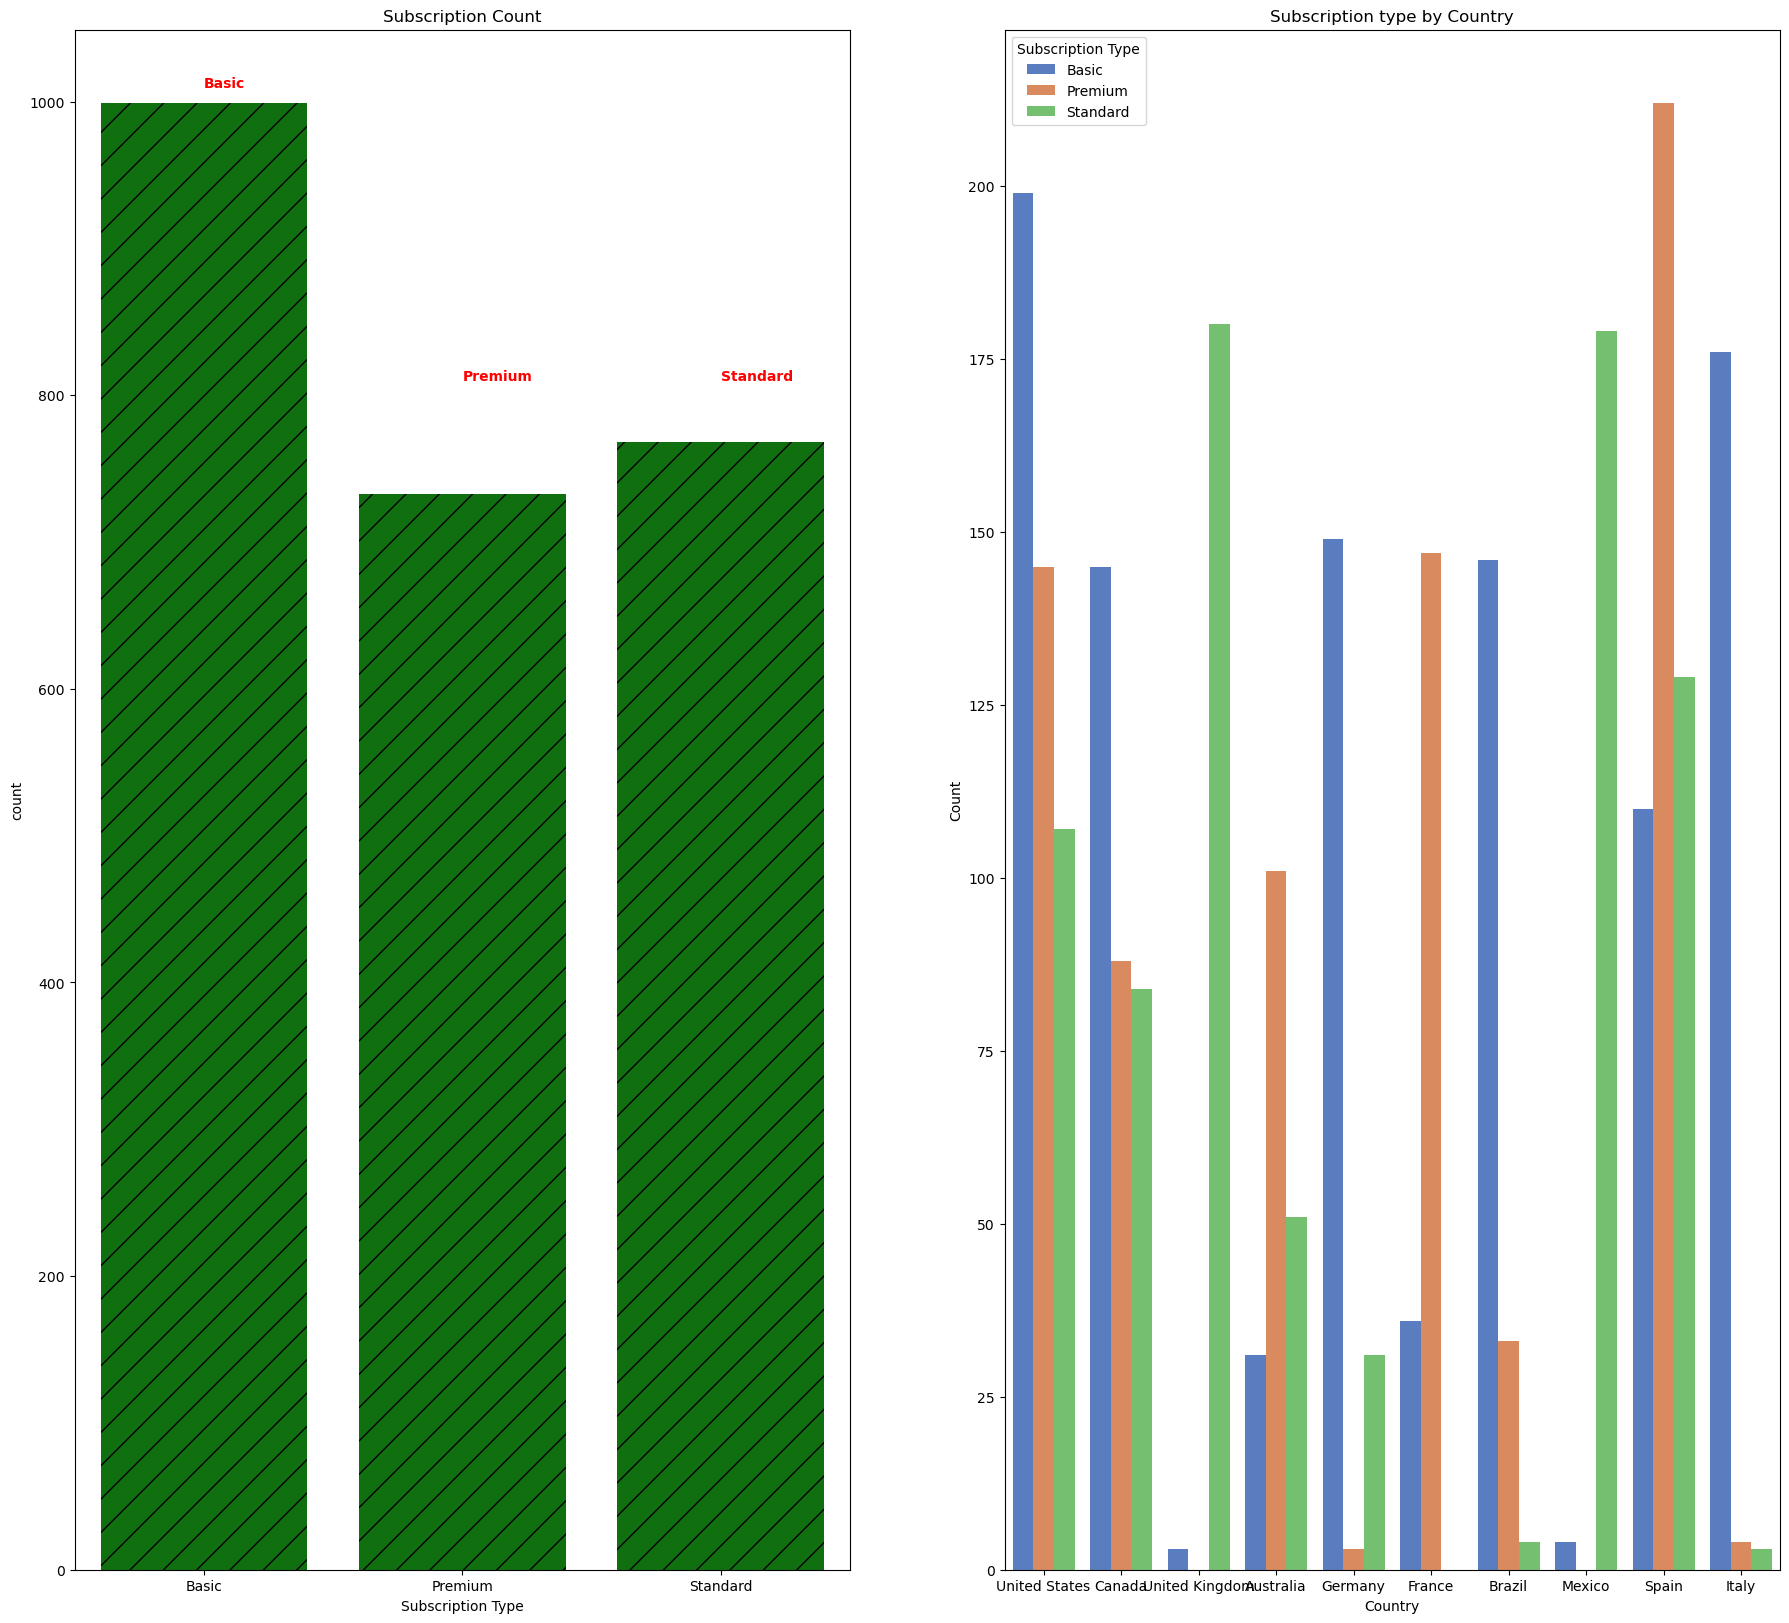

In [11]:
plt.figure(figsize=(22,20))
plt.subplot(1,2,1)
plt.title("Subscription Count")
sns.countplot(x="Subscription Type", data=nf, color="green", hatch="/")
# apply text on plots
plt.text(0,1010, "Basic", fontsize=10, fontweight="bold", color="red")
plt.text(1,810, "Premium", fontsize=10, fontweight="bold", color="red")
plt.text(2,810,"Standard", fontsize=10, fontweight="bold", color="red")
plt.subplot(1,2,2)
sns.countplot(data=nf, x="Country", hue="Subscription Type", palette="muted")
plt.title("Subscription type by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Subscription Type")
plt.show()

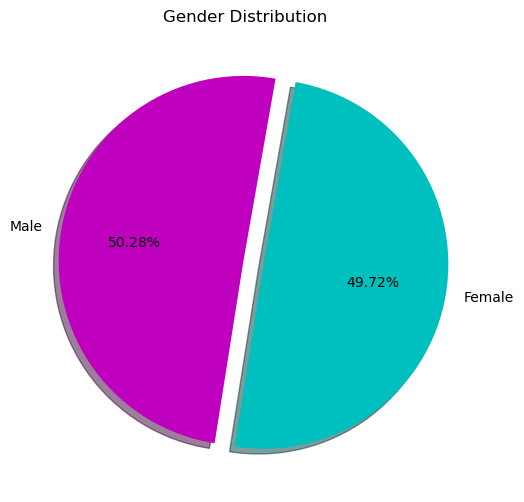

In [12]:
plt.figure(figsize=(8,6))
gender=nf.Gender.value_counts()
index=["Male", "Female"]
colors=["m", "c"]
exp= [0.01,0.1]
values=gender.values.tolist()
plt.pie(values, labels=index, autopct= "%.2f%%",colors=colors, explode=exp, shadow=True, startangle=80)
plt.title("Gender Distribution")
plt.show()


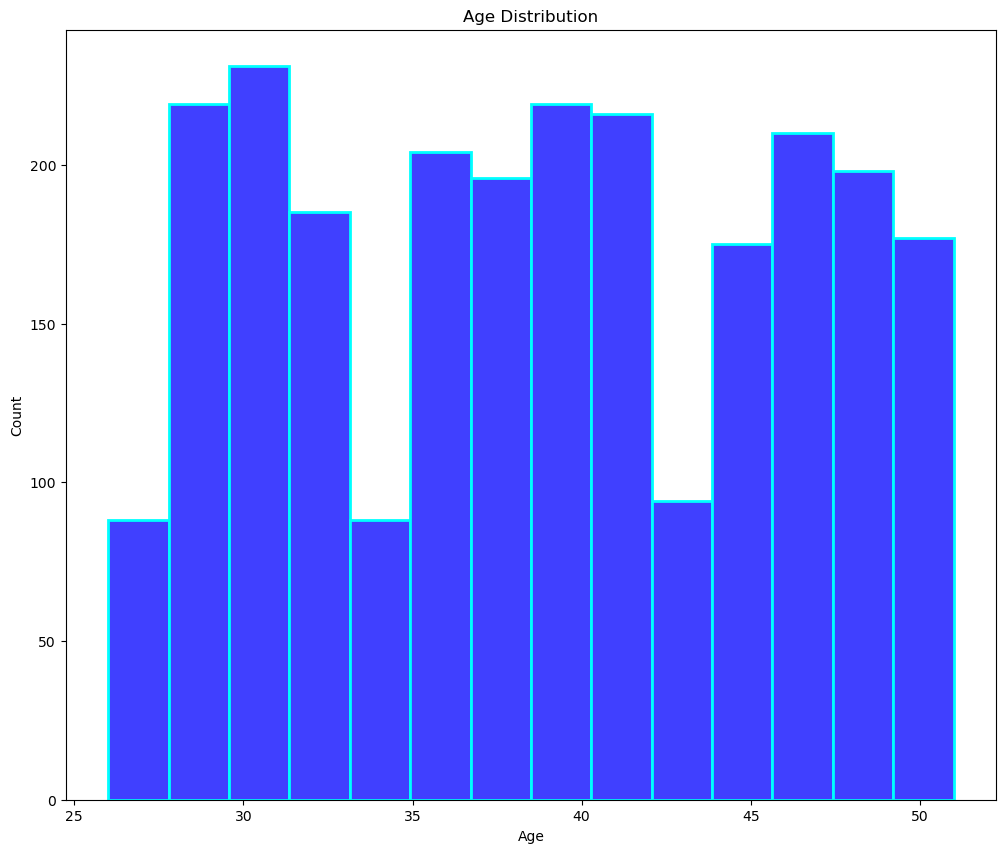

In [13]:
plt.figure(figsize=(12,10))
sns.histplot(data=nf, x="Age", color="b", edgecolor="cyan", lw=2)
plt.title("Age Distribution")
plt.show()

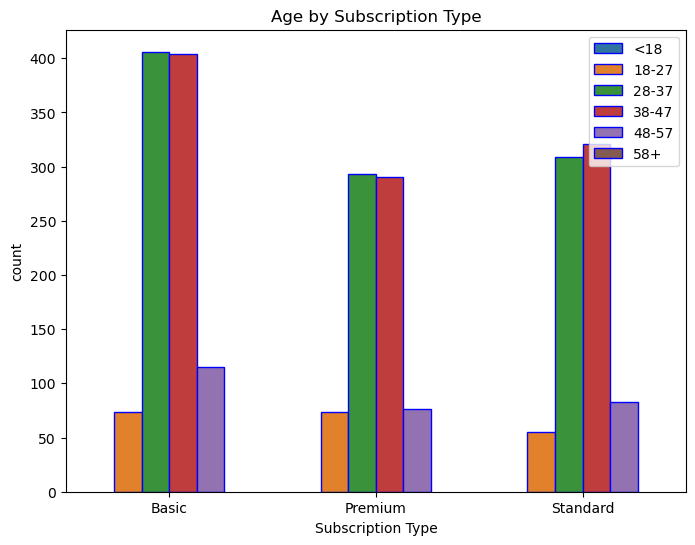

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data=nf, x="Subscription Type", hue="Age Bins", edgecolor="blue",lw=1)
plt.title("Age by Subscription Type")
plt.legend(loc="upper right")
plt.show()

# Monthly revenue by country and device revenue monthly

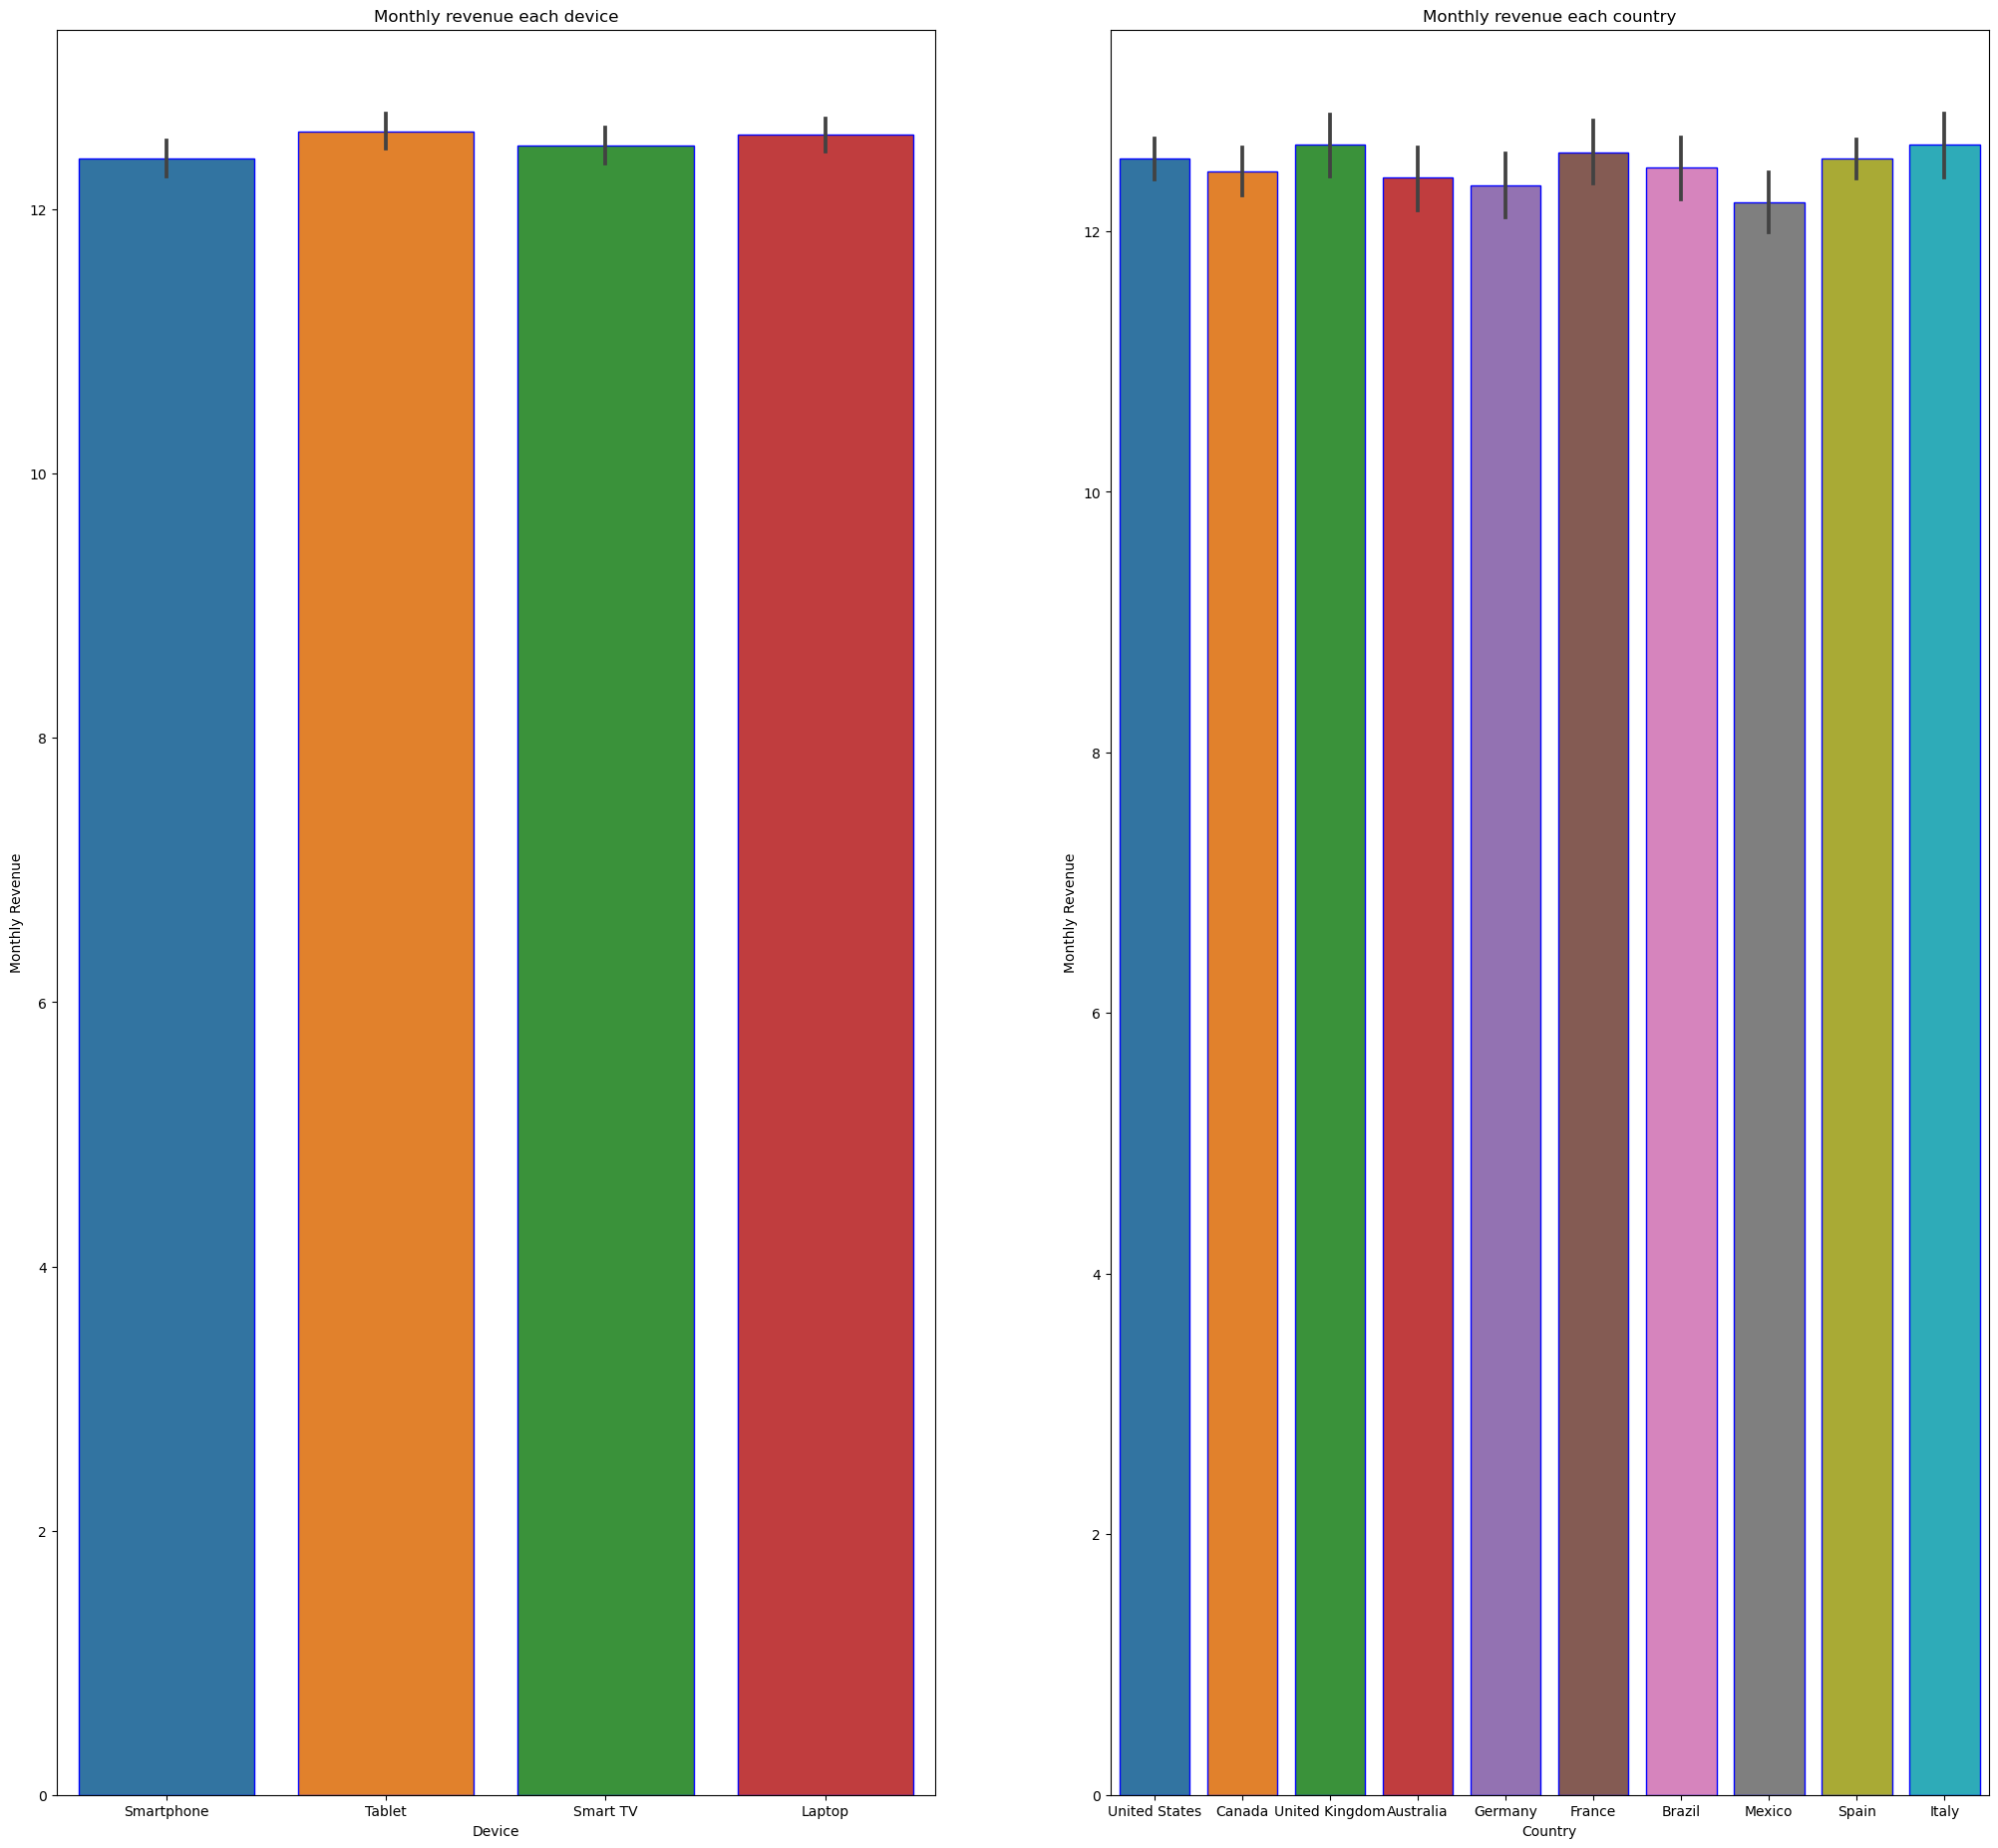

In [15]:
plt.figure(figsize=(25,23))
plt.subplot(1,2,1)

# Device name
sns.barplot(x="Device", y='Monthly Revenue', data=nf, edgecolor="blue")
plt.title("Monthly revenue each device")

# Country by revenue

plt.subplot(1,2,2)
sns.barplot(x="Country", y="Monthly Revenue", data=nf, edgecolor="blue")
plt.title("Monthly revenue each country")
plt.show()

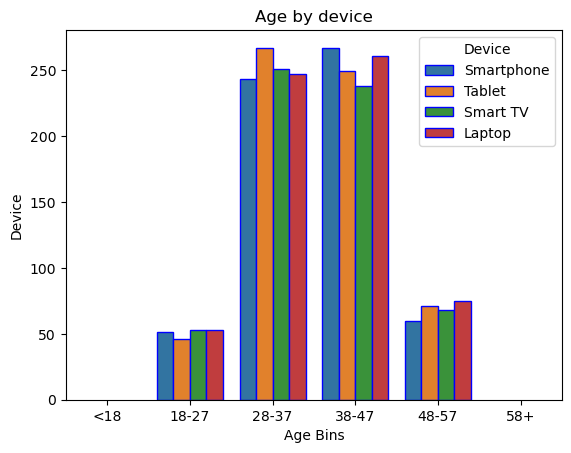

In [16]:
# pepole of this age group are using this device
sns.countplot(x="Age Bins", hue="Device", data=nf, edgecolor="blue", lw=1)
plt.title("Age by device")
plt.ylabel("Device")
plt.show()

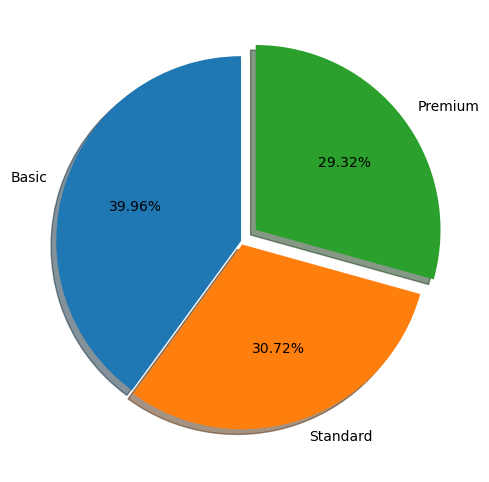

In [17]:
# percentage of subscription
x=nf["Subscription Type"].value_counts(ascending=False)
index= [i for i in x.index] 
var = [0,0.02,0.1]
plt.figure(figsize=(8,6))
plt.pie(x.values, labels=index, autopct="%.2f%%", explode= var, shadow=True, startangle=90)
plt.show()

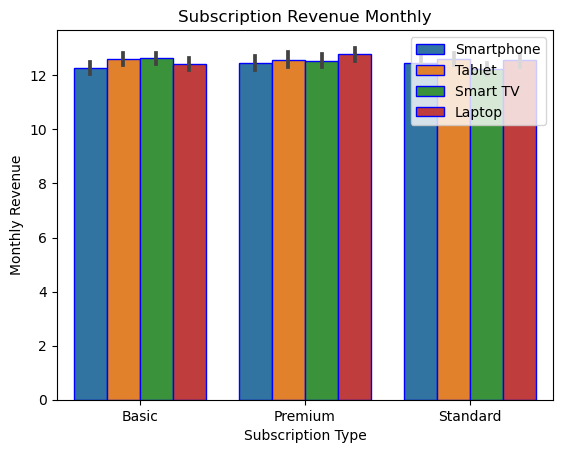

In [19]:
# Subscirption revenue every month
sns.barplot(x="Subscription Type", y="Monthly Revenue", hue="Device", data=nf, edgecolor="blue", lw=1)
plt.legend(loc="upper right")
plt.title("Subscription Revenue Monthly")
plt.show()

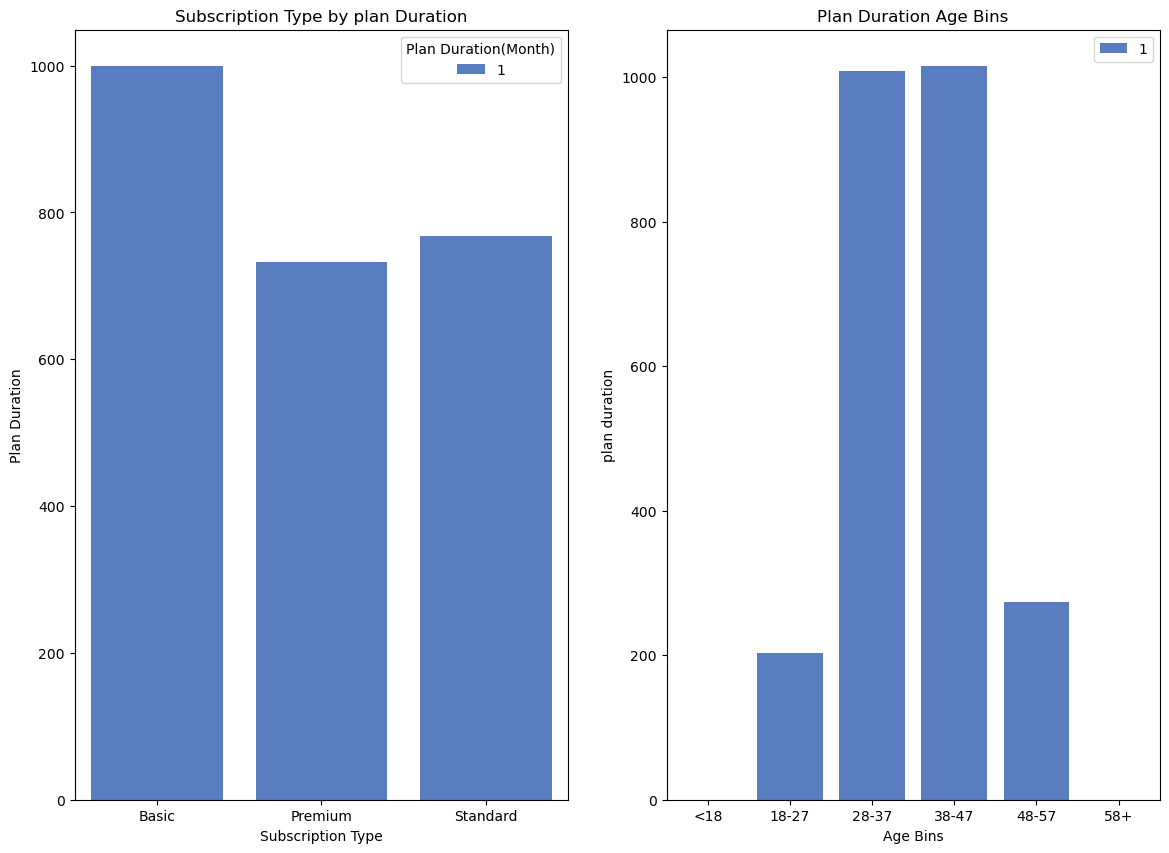

In [20]:
# Subscription type by plan duration
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.countplot(data=nf, x="Subscription Type", hue="Plan Duration(Month)", palette="muted")
plt.title("Subscription Type by plan Duration")
plt.ylabel("Plan Duration")
#plan duration of ages
plt.subplot(1,2,2)
sns.countplot(data=nf, x="Age Bins", hue="Plan Duration(Month)", palette="muted")
plt.title("Plan Duration Age Bins")
plt.ylabel("plan duration")
plt.legend(loc="upper right")
plt.show()

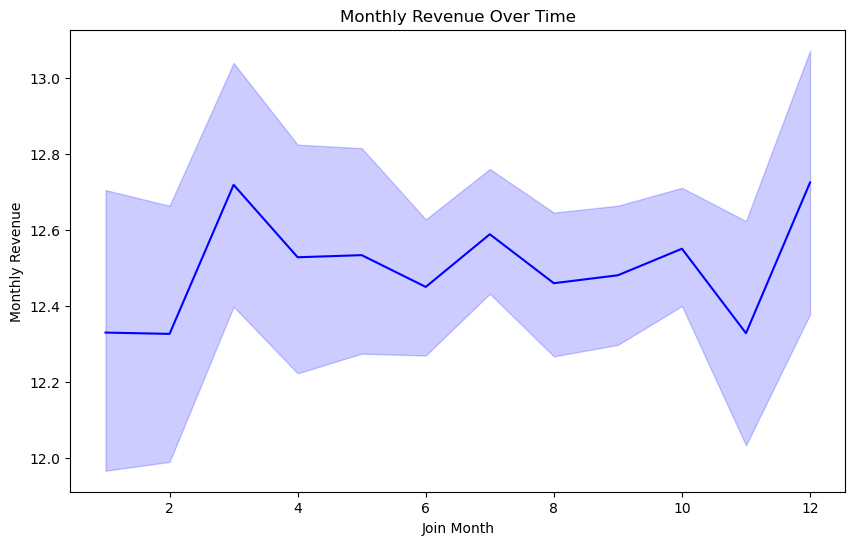

In [22]:
# Monthly revenue
plt.figure(figsize=(10,6))
sns.lineplot(x="Join Month", y="Monthly Revenue", data=nf, estimator="mean", color="blue")
plt.title("Monthly Revenue Over Time")
plt.show()